In [86]:
import numpy as np
import healpy as hp
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
import fitsio
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

In [87]:
#Load himalayas data (generated by desi_himalayas_search.ipynb)
#The column names are
#ra dec z Mr
hm = np.loadtxt("himalayas.txt", skiprows=1)

In [88]:
#The mask that selects where DESI is complete
mask = Table.read("himalayas_mask.fits")

In [89]:
#The HEALPix nside parameter for the mask
nside=int((len(mask)/12)**.5)

In [90]:
#The ra and dec coordinates
ra=hm[:,1]
dec=hm[:,2]

In [91]:
#The pixel IDs for every (ra, dec) position
pxid=hp.ang2pix(nside, ra, dec, nest=True,lonlat=True)

In [92]:
#Select the galaxies that fall within the mask
hm_masked=hm[:][np.isin(pxid, mask[mask["DONE"]==1]["HPXPIXEL"])]

About a 40% of the galaxies in himalayas are within the completion mask

In [93]:
hm_masked.shape[0]/hm.shape[0]

0.38647885028716394

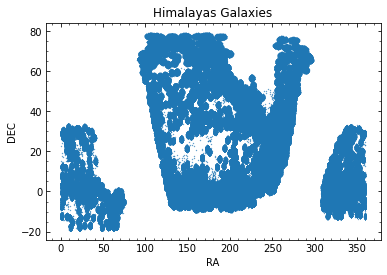

In [97]:
#Before mask
plt.scatter(ra,dec,s=.1)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Himalayas Galaxies")
plt.show()

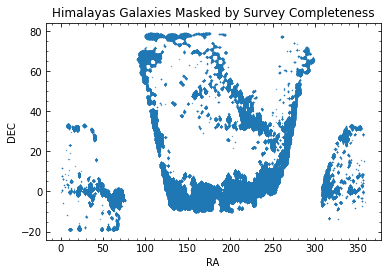

In [98]:
#After mask
plt.scatter(hm_masked[:,1],hm_masked[:,2],s=.1)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Himalayas Galaxies Masked by Survey Completeness")
plt.show()

In [61]:
#Save masked output
np.savetxt("himalayas_masked.txt",hm_masked[:,1:],header="ra dec z Mr")

In [62]:
#After using the saved masked output with Himalayas_VoidFinder.py, we can see the 
#locations of the resulting maximal spheres
maxs=np.loadtxt("desi_full_maximals.txt")

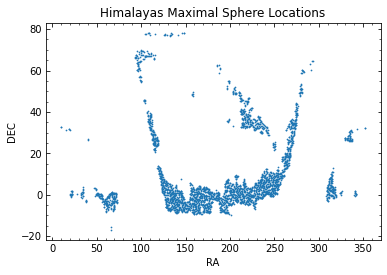

In [99]:
plt.scatter(maxs[:,7]%360,maxs[:,8],s=.5)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Himalayas Maximal Sphere Locations")
plt.show()